In [ ]:
# !conda activate base
# You will need to activate the base conda environment to use the below 
# libraries, it should be something like conda activate base

In [1]:
import pandas as pd 
import numpy as np
import math
import sklearn 
import matplotlib.pyplot as plt

# Filtering

In [12]:
chromosome = 'chr20'
threshold = 0.9
file_path = f'predictions/proba_predictions/{chromosome}_scores.txt'

df = pd.read_csv(file_path, sep = '\t')
df = df[df['score'] >= threshold]
df

,chrom,POS,POS_INCR,score
78050,chr20,391581,391582,0.987173
78051,chr20,391585,391586,0.987327
78052,chr20,391586,391587,0.976091
78053,chr20,391589,391590,0.976056
78054,chr20,391592,391593,0.972438
...,...,...,...,...
14706843,chr20,63451924,63451925,0.984287
14706857,chr20,63451980,63451981,0.985695
14846691,chr20,63918148,63918149,0.982119
14846692,chr20,63918158,63918159,0.982419


In [13]:
df = df[['chrom', 'POS', 'POS_INCR']]
df

,chrom,POS,POS_INCR
78050,chr20,391581,391582
78051,chr20,391585,391586
78052,chr20,391586,391587
78053,chr20,391589,391590
78054,chr20,391592,391593
...,...,...,...
14706843,chr20,63451924,63451925
14706857,chr20,63451980,63451981
14846691,chr20,63918148,63918149
14846692,chr20,63918158,63918159


In [14]:
df.to_csv(f"filter_ontology/{chromosome}_{threshold}.bed", sep = '\t', index = False, header = None)

# Score distribution

In [2]:
chromosome = 'chr20'
threshold = 0.2
import seaborn as sns
file_path = f'predictions/proba_predictions/{chromosome}_scores.txt'
def visualize_scores(file_path, threshold = 0):
    plt.figure(figsize = (16,12))
    df = pd.read_csv(file_path, sep = '\t')
    df = df[df['score'] > threshold]
    # sns.displot(data=df, x="score", kind="kde")
    sns.displot(data=df, x="score")
    # plt.title("Predicted Score Distribution")
    plt.xlabel("CaraVaN's score distribution for chr20")
    plt.xticks([0.2,0.4,0.6,0.8,1.0])
    # plt.savefig(f"filter_ontology/{chromosome}_{threshold}.png", dpi = 1000, bbox_inches = 'tight')
    plt.show()
    

# visualize_scores(file_path)

/scratch/ud84/extngocduyt/miniconda/conda/envs/jupyterlab/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1600x1200 with 0 Axes>

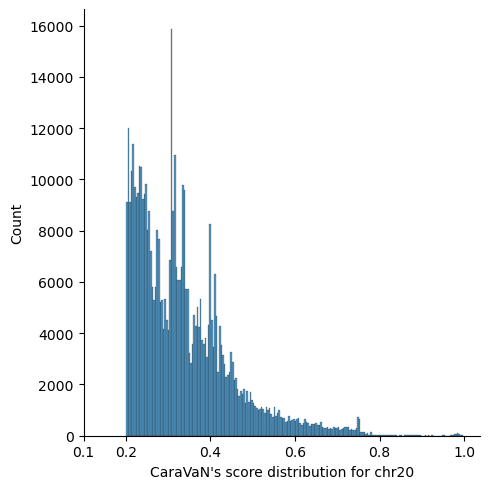

In [38]:
visualize_scores(file_path, threshold = threshold)

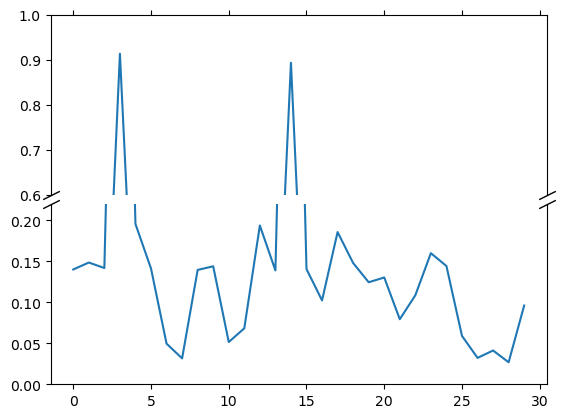

In [35]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(19680801)

pts = np.random.rand(30)*.2
# Now let's make two outlier points which are far away from everything.
pts[[3, 14]] += .8

# If we were to simply plot pts, we'd lose most of the interesting
# details due to the outliers. So let's 'break' or 'cut-out' the y-axis
# into two portions - use the top (ax1) for the outliers, and the bottom
# (ax2) for the details of the majority of our data
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)  # adjust space between axes

# plot the same data on both axes
ax1.plot(pts)
ax2.plot(pts)

# # zoom-in / limit the view to different portions of the data
ax1.set_ylim(.6, 1.)  # outliers only
ax2.set_ylim(0, .22)  # most of the data

# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Now, let's turn towards the cut-out slanted lines.
# We create line objects in axes coordinates, in which (0,0), (0,1),
# (1,0), and (1,1) are the four corners of the axes.
# The slanted lines themselves are markers at those locations, such that the
# lines keep their angle and position, independent of the axes size or scale
# Finally, we need to disable clipping.

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)


plt.show()
